<a href="https://colab.research.google.com/github/GustavoBD-Dev/ThesisProjectDDRUCNN/blob/main/ThesisProjectDDRUCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Retinopatia Diabetica utilizando Redes Neuronales Convolucionales

## Set de datos

El conjunto de imagenes de obtiene de Kaggle, se proporciona un archivo comprimido `archive.zip`, que contiene una carpeta con mas de 35000 imagenes y un archivo `trainLabels.csv` el cual contiene la información del set de datos. 

In [34]:
# Importamos todas las librerias necesarias
import numpy as np
import pandas as pd
import os
import cv2
#from google.colab import files # load file

In [35]:
# Carga del archivo csv
#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

## Analisis de datos

Realizamos la lectura del archivo `csv`, mostramos el encabezado del archivo, al realizar la lectura del archivo con la libreria `pandas` de puede tratar como un dataset.

In [36]:
# Lectura del archivo csv
data = pd.read_csv('trainLabels.csv')
# Mostramos encabezado del archivo
data.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


El dataset contiene dos columnas `[image]` y `[level]`, la columna `image` contiene el nombre de la imagen sin extención del archivo y la columna `level` corresponde a la etiqueta con el nivel de RD que se le a asignado. Realizamos una grafica para mostrar el balanceo de los datos.

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

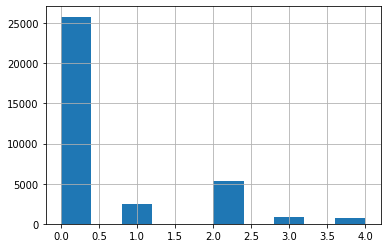

In [37]:
data['level'].hist()
data['level'].value_counts()

In [38]:
# agregamos jpeg a cada valor de image para relacionarlo con las imagenes del dataset
# se guarda en una nueva columna
data['image_name'] = [i + '.jpeg' for i in data['image'].values]
print(data.head())
print('\n')

      image  level     image_name
0   10_left      0   10_left.jpeg
1  10_right      0  10_right.jpeg
2   13_left      0   13_left.jpeg
3  13_right      0  13_right.jpeg
4   15_left      1   15_left.jpeg




## Balanceo de los datos

Como podemos ver en la grafica que corresponde al total de datos por clase, las clases se encuentran desbalanceadas, el minimo de imagenes de las clases es de 708. Se debe realizar un balanceo de las clases, se ha optado por eliminar las imagenes de las clases restantes, con el fin de tener el mismo numero de imagenes por cada clase. En este caso se obtendran 700 imagenes de cada clase, de aqui se obtendran las imagenes para el entrenamiento y prueba de la red.

In [39]:
#Importamos archivo CSV como DataFrame
import pandas as pd # para manejar los dataset 
import shutil # para mover los archivos
import csv

# Lectura y vizualizacion del archivo CSV con las etiquetas
data = pd.read_csv('trainLabels.csv')
print(data.head())
print('\n')

# agregamos jpeg a cada valor de image para relacionarlo con las imagenes del dataset
# se guarda en una nueva columna
data['image_name'] = [i + '.jpeg' for i in data['image'].values]
print(data.head())
print('\n')

# Debemos obtener el mismo numero de imagenes en cada clase para balancear la data
levels = {
    'level_0':0, 
    'level_1':0, 
    'level_2':0, 
    'level_3':0, 
    'level_4':0, }
images = [] # nombre de las imagenes
images_name = [] # guarda el nombre de las imagenes con extención 'jpeg'
labels = [] # guarga la etiqueta correpondiente al nombre en images

# Recorremos el DataFrame analizando el atributo 'level' de los datos
for i in data.index:
    # Recorremos los 5 nivels de RD
    for j in [0,1,2,3,4]:
        # Buscamos el nivel de RD del DataSet
        if data['level'][i] == j: # encuentra el nivel de RD 
            # si no tenemos completos los datos de esa clase se agrega 
            if levels['level_{}'.format(j)] < 700:
                # copiamos la imagen a la carpeta final (train)
                shutil.copy('resized_train/resized_train/{}'.format(data['image_name'][i]), "train/{}".format(data['image_name'][i]))
                # incrementamos el valor de los datos de las clases en el diccionario
                levels['level_{}'.format(j)]+=1
                # agregamos el nombre de la imagen y el nivel
                images.append(data['image'][i])
                images_name.append(data['image_name'][i])
                labels.append(j)

#print(levels)
#print(images)
#print(labels)

with open('trainLabelsBalanced.csv', 'w+', newline = '') as file:
    writer = csv.writer(file)
    writer.writerow(['image','level', 'image_name'])
    for i in range(len(images)):
        writer.writerow([images[i], labels[i], images_name[i]])

print('Balanceo terminado')

      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1


      image  level     image_name
0   10_left      0   10_left.jpeg
1  10_right      0  10_right.jpeg
2   13_left      0   13_left.jpeg
3  13_right      0  13_right.jpeg
4   15_left      1   15_left.jpeg


Balanceo terminado


Analizamos el archivo `csv` que se ha generado con los nuevos datos, para revisar el balanceo de clases.

In [40]:
# Lectura del archivo csv
dataClean = pd.read_csv('trainLabelsBalanced.csv')
# Mostramos encabezado del archivo
dataClean.head()

,image,level,image_name
0,10_left,0,10_left.jpeg
1,10_right,0,10_right.jpeg
2,13_left,0,13_left.jpeg
3,13_right,0,13_right.jpeg
4,15_left,1,15_left.jpeg


0    700
1    700
2    700
4    700
3    700
Name: level, dtype: int64

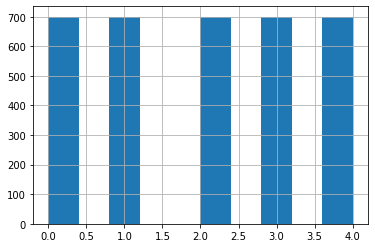

In [41]:
dataClean['level'].hist()
dataClean['level'].value_counts()

## Visualización de los datos

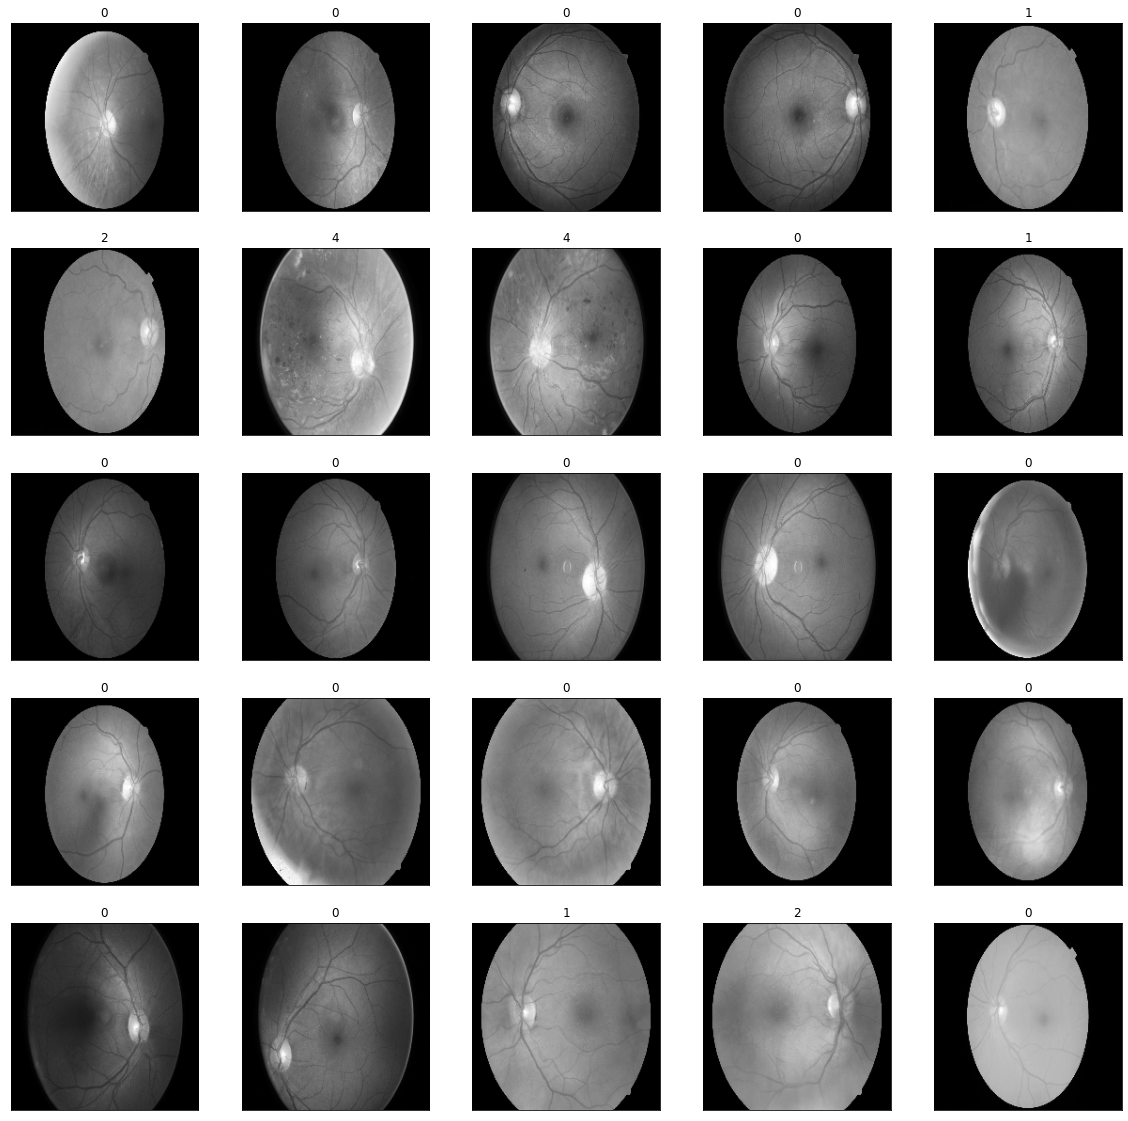

In [42]:
import cv2
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
#dimension de la imagen
TAMANIO_IMG = 200

for i in range(0,25):# len(dataClean['image_name'])):
  image = cv2.imread( 'train/' + dataClean['image_name'][i])
  image = cv2.resize(image,(TAMANIO_IMG, TAMANIO_IMG))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.title(dataClean['level'][i])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap='gray')


## Datos de entrenamiento y datos de prueba

Se tienen 700 datos de cada clase, por lo que se tomaran 600 imagenes para el entrenamiento del modelo y 100 restantes para el set de prueba, hacemos la separacion de los datos, agregamos la etiqueta a cada imagen, esto dentro del archivo `csv` para despues leerlo nuevamente como un dataframe.

In [51]:
#Importamos archivo CSV como DataFrame
import matplotlib.pyplot as plt
import pandas as pd # para manejar los dataset 
import shutil # para mover los archivos
import csv

# Lectura y vizualizacion del archivo CSV con las etiquetas
data = pd.read_csv('trainLabelsBalanced.csv')
print(data.head())
print('\n')

# se muestran las clases balanceadas
#data['level'].hist()
#data['level'].value_counts()
#plt.show()

# Debemos obtener el mismo numero de imagenes en cada clase para balancear la data
levels = {
    'level_0':0, 
    'level_1':0, 
    'level_2':0, 
    'level_3':0, 
    'level_4':0, }
images = [] # nombre de las imagenes
images_name = [] # guarda el nombre de las imagenes con extención 'jpeg'
labels = [] # guarga la etiqueta correpondiente al nombre en images
train_test = [] #guarda la etiqueta con el nombre del set al que pertence


# Recorremos el DataFrame analizando el atributo 'level' de los datos
for i in data.index:
    # Recorremos los 5 nivels de RD
    for j in [0,1,2,3,4]:
        # Buscamos el nivel de RD del DataSet
        if data['level'][i] == j: # encuentra el nivel de RD 
            # si no tenemos completos los datos de esa clase se agrega 
            if levels['level_{}'.format(j)] < 600:
                # se asigna a set para entrenamiento
                train_test.append('train')
            else:
                # se asigna a set para prueba
                train_test.append('test')

            # incrementamos el valor de los datos de las clases en el diccionario
            levels['level_{}'.format(j)]+=1
            # agregamos el nombre de la imagen y el nivel
            images.append(data['image'][i])
            images_name.append(data['image_name'][i])
            labels.append(j)

with open('trainLabelsBalanced.csv', 'w+', newline = '') as file:
    writer = csv.writer(file)
    writer.writerow(['image','level', 'image_name', 'train_test'])
    for i in range(len(images)):
        writer.writerow([images[i], labels[i], images_name[i], train_test[i]])

# Lectura del archivo csv
dataClean = pd.read_csv('trainLabelsBalanced.csv')
# Mostramos encabezado del archivo
dataClean.head()

print('Fin del programa')

      image  level     image_name train_test
0   10_left      0   10_left.jpeg      train
1  10_right      0  10_right.jpeg      train
2   13_left      0   13_left.jpeg      train
3  13_right      0  13_right.jpeg      train
4   15_left      1   15_left.jpeg      train


Fin del programa


In [52]:
# Seleccionamos todos los datos de entrenamiento
datos_entrenamiento = []

from PIL import Image
from numpy import asarray

for i in range(len(dataClean['image_name'])):
  if dataClean['train_test'][i] == 'train': # si es del set de entrenamiento
    # abrimos el archivo
    imagen = Image.open('train/{}'.format(dataClean['image_name'][i]))
    # convertir imagen a numpy array
    data = asarray(imagen)
    imagen = cv2.resize(data, (TAMANIO_IMG, TAMANIO_IMG))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(TAMANIO_IMG, TAMANIO_IMG, 1) # cambiar el tamaño a 200, 200, 1
    datos_entrenamiento.append([imagen, dataClean['level'][i]])

In [83]:
datos_entrenamiento[0]

[array([[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        ...,
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]], dtype=uint8),
 0]

numero total de imagenes del entrenamiento

In [45]:
len(datos_entrenamiento)

3000

In [66]:
X = [] #imagenes de entrada
y = [] # etiquetas (0,1,2,3,4)

for i,j in datos_entrenamiento:
    X.append(i)
    y.append(j)

In [67]:
X

[array([[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        ...,
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]], dtype=uint8),
 array([[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        ...,
 
        [[0],
         [0],
         [0],
      

## Normalizacion de los datos

In [68]:
X = np.asarray(X).astype('float32') / 255

In [69]:
X

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [84]:
y = np.asarray(y)
y

array([0., 0., 0., ..., 4., 4., 4.], dtype=float32)

In [78]:
# forma de la X
X.shape

(3000, 200, 200, 1)

El arreglo tiene 3000 entradas, de imagenes de 200x200 con un canal de color, escala de grises

## Arquitectura e hiperparametros

In [90]:
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

batch_size = 60 # Definimos el numero de muestras que se propagaran en a red neuronal
epocas = 10 # Definimos el numero de epocas para el entrenamiento 

filtros = 30 # Definimos el numero de filtros 
nb_pool = 3 # Definimos el tamaño de la matriz para realizar max pooling
nb_conv = 4 # Tamaño del kernel (nucleo) para convolucion

clasificador = Sequential()
clasificador.add(Convolution2D(filtros, kernel_size=(nb_conv, nb_conv), input_shape=(TAMANIO_IMG, TAMANIO_IMG, 1), activation='relu'))
clasificador.add(Convolution2D(filtros, kernel_size=(nb_conv, nb_conv), input_shape=(TAMANIO_IMG, TAMANIO_IMG, 1), activation='relu'))
clasificador.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

clasificador.add(Convolution2D(2*filtros, kernel_size=(nb_conv, nb_conv), activation='relu'))
clasificador.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

#clasificador.add(Dropout(0.5)) #El Dropout se usa para ignorar algunas neuronas durante el entrenamiento

clasificador.add(Flatten())
clasificador.add(Dense(128))#Anade 128 neuronas
clasificador.add(Activation('relu'))

clasificador.add(Dense(256))#Anadimos 256 neuronas
clasificador.add(Activation('sigmoid'))
clasificador.add(Dropout(0.5))

clasificador.add(Dense(5)) #Anade en la salida el mismo numero de neuronas que de clases(osea los niveles de retinopatia)
clasificador.add(Activation('softmax'))

clasificador.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [91]:
clasificador.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 197, 197, 30)      510       
                                                                 
 conv2d_15 (Conv2D)          (None, 194, 194, 30)      14430     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 60)        28860     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 20, 20, 60)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 24000)            

## Entrenamiento del modelo utilizado

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

tensorBoardCNN = TensorBoard(log_dir='logs/cnn')
clasificador.fit(X, y, 
    batch_size=60,
    epochs=epocas,
    callbacks=[tensorBoardCNN])
